# Exemplo Computacional 1
## Minimização de Polinômios

In [42]:
import random
from scipy.stats import expon
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Função objetivo

In [43]:
def objective(x):
    return (12*(x**5) - 975*(x**4) + 28000*(x**3) - 345000*(x**2) + 1800000*x)

## Restrições

In [44]:
def is_unfeasible(x):
    return x < 0 or x > 31

## Gerador de soluções

In [45]:
# Metropolis-Hastings algorithm
def metropolis_hastings(x):
  movement_validity = False
  while not movement_validity:
    xp = feasible_move(x)
    movement_validity = is_valid_move(x, xp)
  return xp
# Check if move is valid
def is_valid_move(x, xp):
  sigma = 3
  #(f(xt+1)/f(x))*q(xt|xt+1)/q(xt+1|xt)
  alpha = (norm.pdf(xp, x,sigma) / norm.pdf(x, x,sigma) ) * norm.pdf(x, xp,sigma) / norm.pdf(xp, x,sigma) 
  return alpha > random.random()
# feasible solution generator
def feasible_move(x):
  unfeasability = True
  while unfeasability:
    xp = x + random.gauss(mu=0.0, sigma=3)
    unfeasability = is_unfeasible(xp)
  return xp

## Simulated Annealing
## Paramêtros

In [46]:
random.seed('0')
T = 1e6       # Start temperature
alpha = 0.95  # Cooling Factor
L = 10        # Steady-State Niters
stop_T = 1    # Stop temperature

# Otimização

In [47]:
iter_data = []  # List to store iteration data
iter = 0
while T >= stop_T:
  # Initialization
  if iter == 0:
    x0 = random.randrange(0,31)
    fs = objective(x0)
    x = x0
  for k in range(L):
    iter += 1
    # Generate a feasible movement (neighborhood generator)
    xp = metropolis_hastings(x)  # neighborhood generator
    fsp = objective(xp)
    dE = fsp - fs
    P = 1 - expon.cdf(-dE/T)  # Probability of acceptance
    # Acceptance Criteria
    if dE> 0 or random.random() <  P:
      fs = fsp
      x = xp
      is_accepted= True
    else:
      is_accepted= False

    # Append iteration data to the list
    iter_data.append({
        '$iter$': iter,
        '$T$': T,
        '$\delta E$':dE,
        '$P$': P,
        '$x$': x,
        '$f_{s}$': fs,
        'is_accepted': is_accepted
        })
    # Update the temperature
    T = alpha * T
print('Done!')

Done!


## Dados

In [66]:
df = pd.DataFrame(iter_data)
df = df.query("is_accepted == True")
df.tail(5)

,$iter$,$T$,$\delta E$,$P$,$x$,$f_{s}$,is_accepted
125,126,1642.293073,-1929.340981,0.308885,20.220748,4.397786e+06,True
168,169,180.952959,2050.227653,1.000000,19.939627,4.399836e+06,True
179,180,102.926060,-199.255680,0.144293,20.089617,4.399637e+06,True
183,184,83.833919,273.224811,1.000000,20.044580,4.399910e+06,True
239,240,4.741783,86.213905,1.000000,20.008681,4.399997e+06,True


## Análise Gráfica

In [49]:
palette = sns.color_palette("rocket_r")

## comportamento da função objetivo

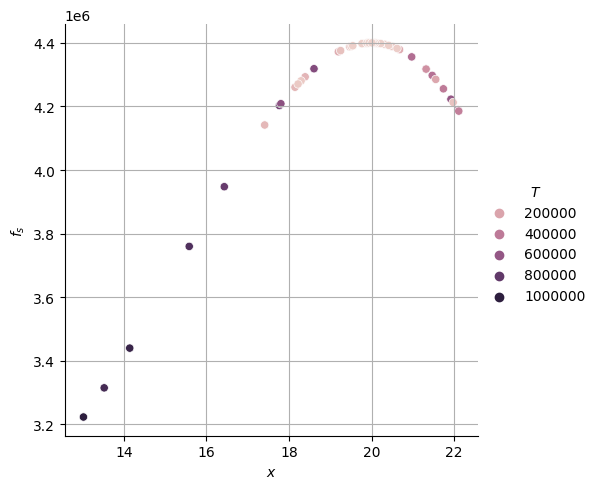

In [59]:
sns.relplot(data=df,x="$x$",y="$f_{s}$",hue="$T$",kind="scatter")
plt.grid()
plt.show()

### Temperatura em função de x

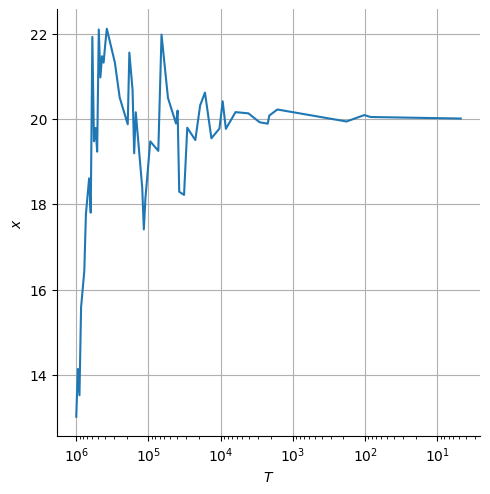

In [60]:
sns.relplot(x="$T$", y="$x$",kind="line",data=df)
plt.gca().invert_xaxis()
plt.xscale('log')
plt.grid()
plt.show()

### Temperatura em função de y

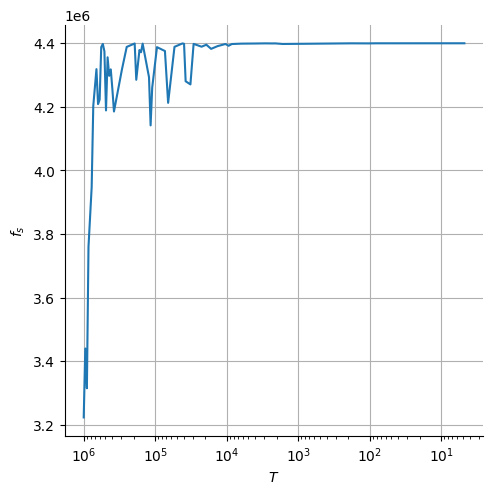

In [61]:
sns.relplot(x="$T$", y="$f_{s}$",kind="line",data=df)
plt.gca().invert_xaxis()
plt.xscale('log')
plt.grid()

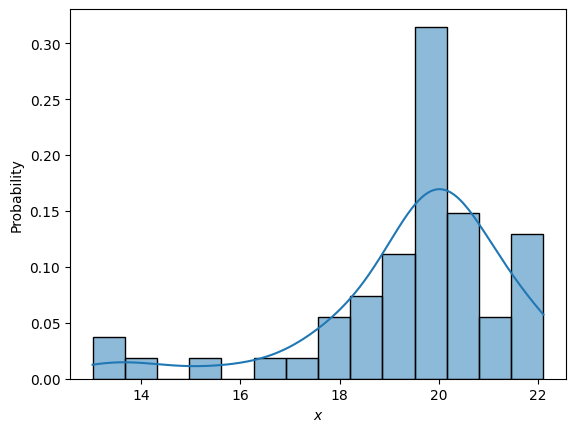

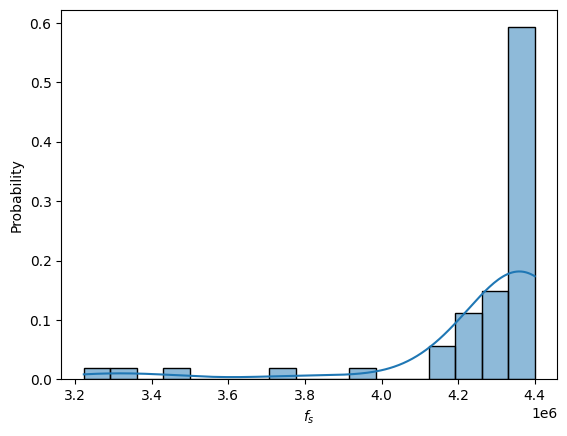

In [53]:
sns.histplot(data=df,x="$x$",stat="probability",kde=True)
plt.figure()
sns.histplot(data=df,x="$f_{s}$",stat="probability",kde=True)
plt.show()